In [162]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import copy
import pickle
import sys
import os
import math

import pytorch_lightning as pl

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [159]:
reps = pd.read_csv('..//coles_report/experiments/report_glove_final.csv').drop(columns=['Unnamed: 0'])

In [160]:
reps.head()

,mod,aggt,esz,metric,value
0,glove_deeptlf9,cat,8,recall_top_k,0.681871
1,glove_deeptlf9,cat,8,acc_boosting,0.574167
2,glove_deeptlf9,cat,8,acc_r_forest,0.560567
3,glove_deeptlf9,sum,8,recall_top_k,0.351773
4,glove_deeptlf9,sum,8,acc_boosting,0.448833


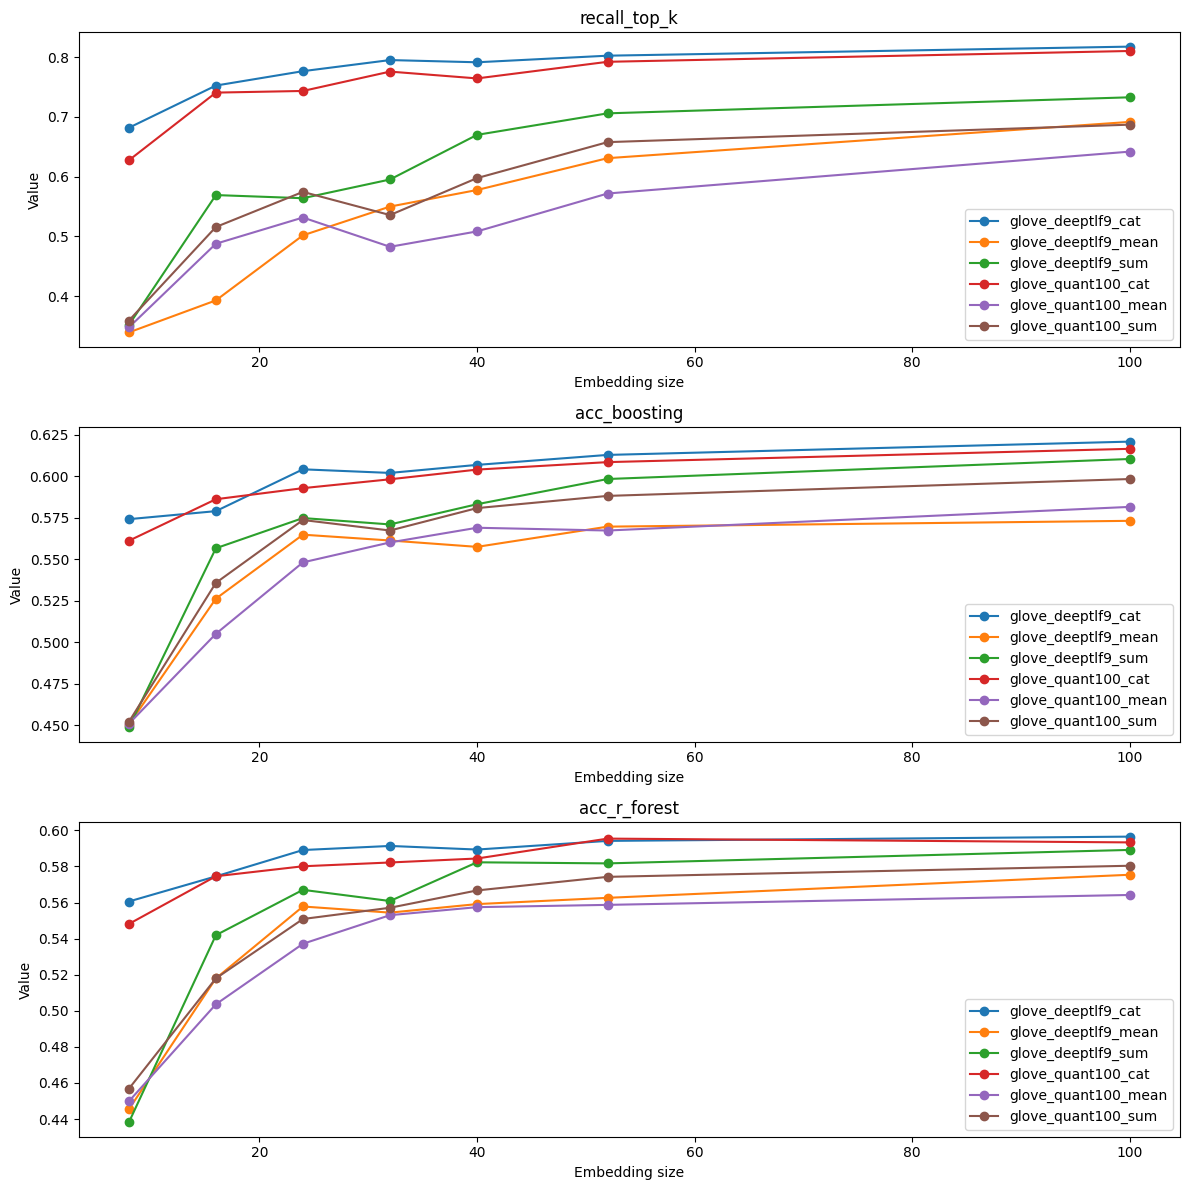

In [152]:
num_plots = len(reps.metric.unique())
rows = 3
cols = 1
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten() if num_plots > 1 else [axes]

x = sorted(reps.esz.unique())
for ax, metric in zip(axes, reps.metric.unique()):
    repm = reps[reps.metric == metric]
    repm = repm.sort_values(by='esz').groupby(['mod', 'aggt'])['value'].apply(list)
    for i in range(repm.shape[0]):
        idx = repm.index[i]
        ax.plot(x[:len(repm[i])], repm[i], label=f"{idx[0]}_{idx[1]}", marker='o')

    ax.set_xlabel('Embedding size')
    ax.set_ylabel(f'Value')
    ax.legend()
    ax.set_title(f'{metric}')

plt.tight_layout()
plt.show()
